-----------

**Disciplina:** Introdução ao Aprendizado Profundo

**PPGEP UFF - 2024.2**

**Professor:** Diogo Ferreira de Lima Silva

-----------


# Aprendizado Supervisionado

# Regressão Linear

In [53]:
import torch

In [54]:
torch.manual_seed(2024)

### Criando um pequeno conjunto de treinamento

In [55]:
X = torch.rand(100, 1) * 10  # 100 exemplos, 1 atributo
y = 2 * X + 3 + torch.randn(100, 1) * 0.5  # y = 2x + 3 + \epsilon

In [56]:
print(f'X: {X[:10]}')
print('-------------------\n-------------------')
print(f'y: {y[:10]}')

X: tensor([[5.3172],
        [8.3127],
        [9.7184],
        [1.1930],
        [1.6690],
        [3.4946],
        [2.1499],
        [6.2013],
        [4.8485],
        [7.4921]])
-------------------
-------------------
y: tensor([[13.9780],
        [19.0837],
        [22.0252],
        [ 4.9884],
        [ 6.5963],
        [10.5538],
        [ 7.3127],
        [16.2466],
        [12.6152],
        [17.6978]])


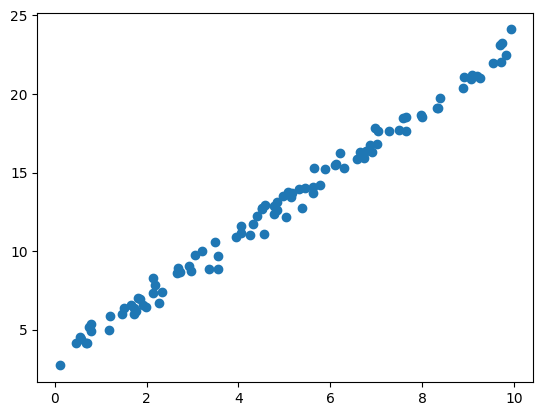

In [57]:
import matplotlib.pyplot as plt

plt.scatter(X,y)

## Criando um modelo de regressão linear com o pytorch


A definição de um modelo com uma rede no Pytorch é realizada a partir de uma classe.

Além disso, é muito comum o uso dos métodos presente no **nn.Module**. Podemos herdar as características dessa classe usando o termo **super** em nossa classe. Vejamos:

In [58]:
# Criando a Classe do Modelo
class LinearRegressionModel(torch.nn.Module):
    def __init__(self, number_of_features):
        super(LinearRegressionModel, self).__init__()  # herdando as características do **nn.Module**
        # Criando uma única camada linear que com **number_of_features** unidades 
        self.linear = torch.nn.Linear(number_of_features, 1)  # Input size: number_of_features, output size: 1

    def forward(self, x):
        return self.linear(x)
    

### Conjunto de Dados como um DataLoader

O uso de DataLoader no pytorch facilita o treinamento com a definição de parâmetros que definem o tamanho do lote e a aleatorização de sua composição!

In [59]:
from torch.utils.data import DataLoader, TensorDataset

In [60]:
dataset = TensorDataset(X, y)
data_loader = DataLoader(dataset, batch_size=1, shuffle=True)

### Treinamento Stochastic Gradient Descent (SGD)

Como temos um modelo de Regressão Linear Simples, vamos utilizar o erro médio quadrático.

Várias métricas de erro já estão disponíveis para uso no pytorch!

In [61]:
from torch.functional import F

In [62]:
lr = LinearRegressionModel(number_of_features=1) # Instanciando o modelo
optimizer = torch.optim.SGD(lr.parameters(), lr=0.01) # Selecionando o otimizador (usaremos Stochastic Gradient Descent)

n_epocas = 1000
for ep in range(n_epocas):
    for batch_x, batch_y in data_loader:
        y_pred = lr.forward(X)  # Propagação para frente
        loss = F.mse_loss(y_pred, y) # Calcula o erro
        optimizer.zero_grad() # Zera os gradients da última época
        loss.backward() # Propagação para trás (o pytorch realiza as derivadas da função perda em relação aos parâmetros)
        optimizer.step() # Atualiza os parâmetros 
    
    print(f'Época {ep+1}, Perda: {loss}')

Época 1, Perda: 1.1060774326324463
Época 2, Perda: 0.5785753130912781
Época 3, Perda: 0.37527236342430115
Época 4, Perda: 0.2969176173210144
Época 5, Perda: 0.2667189836502075
Época 6, Perda: 0.2550801932811737
Época 7, Perda: 0.2505946457386017
Época 8, Perda: 0.24886566400527954
Época 9, Perda: 0.24819941818714142
Época 10, Perda: 0.24794264137744904
Época 11, Perda: 0.2478436678647995
Época 12, Perda: 0.24780550599098206
Época 13, Perda: 0.2477908730506897
Época 14, Perda: 0.24778516590595245
Época 15, Perda: 0.24778300523757935
Época 16, Perda: 0.2477821409702301
Época 17, Perda: 0.24778182804584503
Época 18, Perda: 0.24778161942958832
Época 19, Perda: 0.2477816641330719
Época 20, Perda: 0.24778160452842712
Época 21, Perda: 0.24778153002262115
Época 22, Perda: 0.24778155982494354
Época 23, Perda: 0.2477816343307495
Época 24, Perda: 0.24778155982494354
Época 25, Perda: 0.24778155982494354
Época 26, Perda: 0.24778155982494354
Época 27, Perda: 0.24778155982494354
Época 28, Perda: 0.24

In [63]:
print(f'w: {lr.linear.weight.item()}')
print(f'b: {lr.linear.bias.item()}')

w: 1.9851449728012085
b: 3.1190237998962402


### Treinamento Gradient Descent (full batch SGD)


Vamos utilizar agora o gradiente descendente tradicional. 

A única alteração é que não utilizaremos os lotes do data_loader. Faremos isso comentando o loop.

**Observação**: Outra opção seria recriar o data_loader com um full batch (batch_size = 100)

In [64]:
lr = LinearRegressionModel(number_of_features=1) # Instanciando o modelo
optimizer = torch.optim.SGD(lr.parameters(), lr=0.01) # Selecionando o otimizador (usaremos Stochastic Gradient Descent)

n_epocas = 1000
for ep in range(n_epocas):   
    #for batch_x, batch_y in data_loader:
        y_pred = lr.forward(X)  # Propagação para frente
        loss = F.mse_loss(y_pred, y) # Calcula o erro
        optimizer.zero_grad() # Zera os gradients da última época
        loss.backward() # Propagação para trás (o pytorch realiza as derivadas da função perda em relação aos parâmetros)
        optimizer.step() # Atualiza os parâmetros 
    
        print(f'Época {ep+1}, Perda: {loss}')

Época 1, Perda: 126.77487182617188
Época 2, Perda: 18.93581771850586
Época 3, Perda: 4.460643291473389
Época 4, Perda: 2.5036466121673584
Época 5, Perda: 2.2252113819122314
Época 6, Perda: 2.1719846725463867
Época 7, Perda: 2.1491053104400635
Época 8, Perda: 2.130444049835205
Época 9, Perda: 2.112495183944702
Época 10, Perda: 2.094789743423462
Época 11, Perda: 2.077260971069336
Época 12, Perda: 2.059900999069214
Época 13, Perda: 2.0427052974700928
Época 14, Perda: 2.025672197341919
Época 15, Perda: 2.0088014602661133
Época 16, Perda: 1.9920910596847534
Época 17, Perda: 1.975538969039917
Época 18, Perda: 1.9591445922851562
Época 19, Perda: 1.9429044723510742
Época 20, Perda: 1.92681884765625
Época 21, Perda: 1.9108860492706299
Época 22, Perda: 1.8951048851013184
Época 23, Perda: 1.8794734477996826
Época 24, Perda: 1.8639898300170898
Época 25, Perda: 1.8486528396606445
Época 26, Perda: 1.8334622383117676
Época 27, Perda: 1.8184148073196411
Época 28, Perda: 1.8035118579864502
Época 29, Pe

In [65]:
print(f'w: {lr.linear.weight.item()}')
print(f'b: {lr.linear.bias.item()}')

w: 1.9889918565750122
b: 3.0946133136749268


### Mini batch SDG

In [66]:
dataset = TensorDataset(X, y)
data_loader = DataLoader(dataset, batch_size=16, shuffle=True)


lr = LinearRegressionModel(number_of_features=1) # Instanciando o modelo
optimizer = torch.optim.SGD(lr.parameters(), lr=0.01) # Selecionando o otimizador (usaremos Stochastic Gradient Descent)


n_epocas = 1000
for ep in range(n_epocas):
    for i, (batch_x, batch_y) in enumerate(data_loader):
        y_pred = lr.forward(X)  # Propagação para frente
        loss = F.mse_loss(y_pred, y) # Calcula o erro
        print(f"perda do batch {i} da época {ep} foi de {loss}")
        optimizer.zero_grad() # Zera os gradients da última época
        loss.backward() # Propagação para trás (o pytorch realiza as derivadas da função perda em relação aos parâmetros)
        optimizer.step() # Atualiza os parâmetros 
    
    #print(f'Ao final da época {ep}, Perda: {loss}')

perda do batch 0 da época 0 foi de 111.20419311523438
perda do batch 1 da época 0 foi de 18.074748992919922
perda do batch 2 da época 0 foi de 5.560183525085449
perda do batch 3 da época 0 foi de 3.8545310497283936
perda do batch 4 da época 0 foi de 3.598374128341675
perda do batch 5 da época 0 foi de 3.5368242263793945
perda do batch 6 da época 0 foi de 3.501624345779419
perda do batch 0 da época 1 foi de 3.470212936401367
perda do batch 1 da época 1 foi de 3.439563035964966
perda do batch 2 da época 1 foi de 3.4092655181884766
perda do batch 3 da época 1 foi de 3.379262685775757
perda do batch 4 da época 1 foi de 3.3495490550994873
perda do batch 5 da época 1 foi de 3.320115089416504
perda do batch 6 da época 1 foi de 3.2909607887268066
perda do batch 0 da época 2 foi de 3.262083053588867
perda do batch 1 da época 2 foi de 3.233480215072632
perda do batch 2 da época 2 foi de 3.205148696899414
perda do batch 3 da época 2 foi de 3.1770856380462646
perda do batch 4 da época 2 foi de 3.1

In [67]:
print(f'w: {lr.linear.weight.item()}')
print(f'b: {lr.linear.bias.item()}')

w: 1.9851449728012085
b: 3.1190237998962402


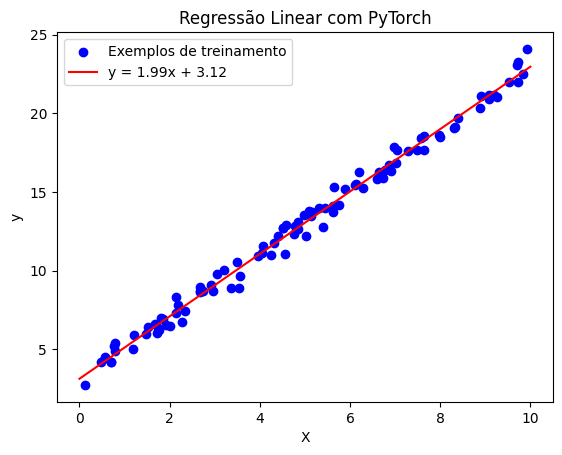

In [68]:
w = lr.linear.weight.item() #Recebe o valor do peso aprendido
b = lr.linear.bias.item() # Recebe o bias


plt.scatter(X, y, color='blue', label='Exemplos de treinamento') # Plota os valores originais
x_line = torch.linspace(0, 10, 100).unsqueeze(1)  # Gera 100 valores igualmente espaçados entre 0 e 10 e coloca eles em uma matriz de uma coluna e 100 linhas.
y_line = lr(x_line).detach()  # Calcula os pontos na reta


plt.plot(x_line, y_line, color='red', label=f'y = {w:.2f}x + {b:.2f}') # Plota a reta

plt.xlabel('X')
plt.ylabel('y')
plt.title('Regressão Linear com PyTorch')
plt.legend()
plt.show()

## Regressão Linear Multivariada

### Criando um conjunto de dados

In [69]:
m = 3 
n = 100  

X = torch.rand(n, m) * 10  # Gerando o dataset

print(X[:5])
X.shape

tensor([[7.4093, 9.2894, 3.6375],
        [7.4373, 5.4225, 7.0623],
        [2.6283, 0.5198, 9.1794],
        [0.7825, 3.9095, 8.1643],
        [5.8957, 4.8580, 0.3706]])


torch.Size([100, 3])

In [70]:
w_ = torch.tensor([2.0, -3.0, 1.5]) 
b_ = 4.0

y = X.matmul(w_) + b_ + torch.randn(n) * 0.5  # Criando os rótulos com uma função linear + um pequeno erro aleatório
y = y.unsqueeze(1)  # Ajustando para "uma coluna"

print(y[:5])
y.shape


tensor([[-3.0940],
        [12.7023],
        [21.1429],
        [ 4.5912],
        [ 2.1448]])


torch.Size([100, 1])

In [71]:
dataset = TensorDataset(X, y)
data_loader = DataLoader(dataset, batch_size=16, shuffle=True)

### Treinamento do modelo

O modelo é exatamente a mesma classe anteriorment criada. Porém, agora temos mais $m=3$ atributos

In [72]:
lr = LinearRegressionModel(number_of_features=m) # Instanciando o modelo
optimizer = torch.optim.SGD(lr.parameters(), lr=0.01) # Selecionando o otimizador (usaremos Stochastic Gradient Descent)


n_epocas = 1000
for ep in range(n_epocas):
    for batch_x, batch_y in data_loader:
        y_pred = lr.forward(X)  # Propagação para frente
        loss = F.mse_loss(y_pred, y) # Calcula o erro
        optimizer.zero_grad() # Zera os gradients da última época
        loss.backward() # Propagação para trás (o pytorch realiza as derivadas da função perda em relação aos parâmetros)
        optimizer.step() # Atualiza os parâmetros 
    
    print(f'Época {ep+1}, Perda: {loss}')

Época 1, Perda: 13.0670166015625
Época 2, Perda: 3.1999881267547607
Época 3, Perda: 1.9600180387496948
Época 4, Perda: 1.7662526369094849
Época 5, Perda: 1.7012499570846558
Época 6, Perda: 1.6532752513885498
Época 7, Perda: 1.608636736869812
Época 8, Perda: 1.5656183958053589
Época 9, Perda: 1.5239697694778442
Época 10, Perda: 1.4836249351501465
Época 11, Perda: 1.4445388317108154
Época 12, Perda: 1.4066733121871948
Época 13, Perda: 1.3699889183044434
Época 14, Perda: 1.3344497680664062
Época 15, Perda: 1.3000192642211914
Época 16, Perda: 1.266663670539856
Época 17, Perda: 1.2343488931655884
Época 18, Perda: 1.2030423879623413
Época 19, Perda: 1.1727131605148315
Época 20, Perda: 1.1433302164077759
Época 21, Perda: 1.1148639917373657
Época 22, Perda: 1.0872869491577148
Época 23, Perda: 1.0605701208114624
Época 24, Perda: 1.034686803817749
Época 25, Perda: 1.0096111297607422
Época 26, Perda: 0.9853183627128601
Época 27, Perda: 0.961783766746521
Época 28, Perda: 0.9389837384223938
Época 2

In [73]:
print(f'w: {lr.linear.weight}')
print(f'b: {lr.linear.bias}')

w: Parameter containing:
tensor([[ 2.0282, -2.9951,  1.4918]], requires_grad=True)
b: Parameter containing:
tensor([3.8595], requires_grad=True)


# Classificação

### Iris - Um conjunto de dados simples e clássico para introdução de problemas de classificação

In [74]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data[:, [0,2]], iris.target # Vamos usar apenas dois atributos para facilitar as visualizações
mask = (y == 0) | (y == 1) # Vamos pegar apenas setosa e virginica
X, y = X[mask], y[mask]

# Passando os dados para tensores
X = torch.tensor(X, dtype=torch.float32)
y =  torch.tensor(y, dtype=torch.int64)


print(X[:5])
print(y[:5])

tensor([[5.1000, 1.4000],
        [4.9000, 1.4000],
        [4.7000, 1.3000],
        [4.6000, 1.5000],
        [5.0000, 1.4000]])
tensor([0, 0, 0, 0, 0])


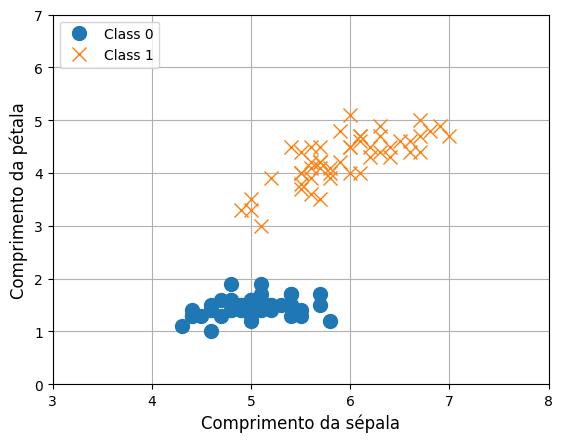

In [75]:
plt.plot(X[y == 0, 0], X[y == 0, 1],
    marker="o",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(X[y == 1, 0], X[y == 1, 1],
    marker="x",
    markersize=10,
    linestyle="",
    label="Class 1",
)


plt.legend(loc=2)
plt.xlim([3, 8])
plt.ylim([0, 7])
plt.xlabel("Comprimento da sépala", fontsize=12)
plt.ylabel("Comprimento da pétala", fontsize=12)
plt.grid()

plt.show()

In [76]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

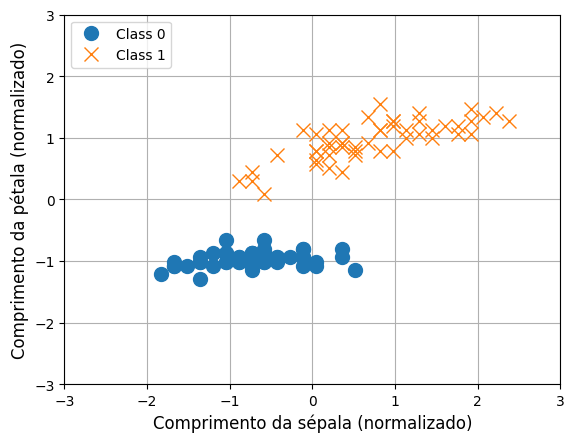

In [77]:
plt.plot(X[y == 0, 0], X[y == 0, 1],
    marker="o",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(X[y == 1, 0], X[y == 1, 1],
    marker="x",
    markersize=10,
    linestyle="",
    label="Class 1",
)


plt.legend(loc=2)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel("Comprimento da sépala (normalizado)", fontsize=12)
plt.ylabel("Comprimento da pétala (normalizado)", fontsize=12)
plt.grid()

plt.show()

In [78]:
dataset = TensorDataset(X,y)
iris_dataloader = train_loader = DataLoader(dataset, batch_size=16,shuffle=True)

# Regressão Logística

In [79]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self, number_of_features):
        super(LinearRegressionModel, self).__init__() 
        self.linear = torch.nn.Linear(number_of_features, 1)  # Input size number_of_features, output size 1

    def forward(self, x):
        return self.linear(x)
    

class LogisticRegressionModel(torch.nn.Module):
    def __init__(self, number_of_features):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(number_of_features, 1)
        
    def forward(self, x):
        z = self.linear(x) # calcula o net input (logit)
        sigma = F.sigmoid(z) # Calcula a estimativa de probablilidade 
        return sigma

In [80]:
torch.manual_seed(2024)
model = LogisticRegressionModel(2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
n_epocas = 500

for e in range(n_epocas):   
    
    model = model.train()
    for i, (batch_x, batch_y) in enumerate(iris_dataloader):
        sigma = model(batch_x)
        l = F.binary_cross_entropy(sigma, batch_y.view(sigma.shape).float())
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        
        print(f'Na época {e+1}/{n_epocas}, no batch {i+1}/{len(iris_dataloader)}, a perda foi= {l:.2f}')
            

Na época 1/500, no batch 1/7, a perda foi= 0.46
Na época 1/500, no batch 2/7, a perda foi= 0.53
Na época 1/500, no batch 3/7, a perda foi= 0.48
Na época 1/500, no batch 4/7, a perda foi= 0.51
Na época 1/500, no batch 5/7, a perda foi= 0.54
Na época 1/500, no batch 6/7, a perda foi= 0.51
Na época 1/500, no batch 7/7, a perda foi= 0.52
Na época 2/500, no batch 1/7, a perda foi= 0.49
Na época 2/500, no batch 2/7, a perda foi= 0.49
Na época 2/500, no batch 3/7, a perda foi= 0.42
Na época 2/500, no batch 4/7, a perda foi= 0.39
Na época 2/500, no batch 5/7, a perda foi= 0.42
Na época 2/500, no batch 6/7, a perda foi= 0.43
Na época 2/500, no batch 7/7, a perda foi= 0.40
Na época 3/500, no batch 1/7, a perda foi= 0.42
Na época 3/500, no batch 2/7, a perda foi= 0.34
Na época 3/500, no batch 3/7, a perda foi= 0.44
Na época 3/500, no batch 4/7, a perda foi= 0.30
Na época 3/500, no batch 5/7, a perda foi= 0.41
Na época 3/500, no batch 6/7, a perda foi= 0.39
Na época 3/500, no batch 7/7, a perda fo

In [81]:
w = model.linear.weight.data
b = model.linear.bias.data

print(f"w={w}\nb={b}")

w=tensor([[0.8418, 5.1750]])
b=tensor([0.8840])


In [82]:
print(w)
print(w[0])
print(w[0][0])
print(b)
print(b[0])

tensor([[0.8418, 5.1750]])
tensor([0.8418, 5.1750])
tensor(0.8418)
tensor([0.8840])
tensor(0.8840)


In [83]:
x1_low = -5
x2_low = (-(w[0][0] * x1_low) - b[0]) / w[0][1]

x1_high = 5
x2_high = (-(w[0][0] * x1_high) - b[0]) / w[0][1]

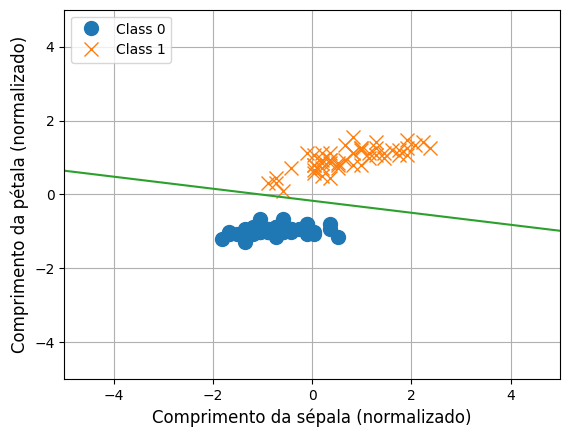

In [84]:
plt.plot(X[y == 0, 0], X[y == 0, 1],
    marker="o",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(X[y == 1, 0], X[y == 1, 1],
    marker="x",
    markersize=10,
    linestyle="",
    label="Class 1",
)


plt.plot([x1_low, x1_high], [x2_low, x2_high])

plt.legend(loc=2)
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.xlabel("Comprimento da sépala (normalizado)", fontsize=12)
plt.ylabel("Comprimento da pétala (normalizado)", fontsize=12)
plt.grid()

plt.show()